An Automated Attendance Tracking System built using Siamese Network from scratch.

#  Data Preprocessing

The Dataset used here is the Labeled Faces in the Wild (LFW) pairs from the sklearn library. <br>
It contains a collection of image pairs both training and test sets with similarity score of 0 or 1( Match or No Match). <br>

In [ ]:
from sklearn.datasets import fetch_lfw_pairs

In [ ]:
import matplotlib.pyplot as plt 

### Load Training Data

In [ ]:
# fetch_lfw_pairs_train = fetch_lfw_pairs(subset = "train", color = True, resize = 1, slice_ = (0,0))

In [ ]:
fetch_lfw_pairs_train = fetch_lfw_pairs(subset = "train", color = True, resize = 1)

In [ ]:
train_pairs = fetch_lfw_pairs_train.pairs
train_labels = fetch_lfw_pairs_train.target
train_target_names = fetch_lfw_pairs_train.target_names

The train subset has 2200 datapoints with 2 images paired together. Each image has 125x94 dimensions.

In [ ]:
print(train_pairs.shape, train_labels.shape, train_target_names.shape)

(2200, 2, 125, 94, 3) (2200,) (2,)


In [ ]:
fetch_lfw_pairs_test = fetch_lfw_pairs(subset = 'test', color = True, resize = 1)

In [ ]:
test_pairs = fetch_lfw_pairs_test.pairs
test_labels = fetch_lfw_pairs_test.target
test_target_names = fetch_lfw_pairs_test.target_names

The test subset has 1000 datapoints with 2 images paired together. Each image has 125x94 dimensions.

In [ ]:
print(test_pairs.shape, test_labels.shape, test_target_names.shape)

(1000, 2, 125, 94, 3) (1000,) (2,)


### Normalizing the Data

The train and test pairs are normalized to scale them from 0-255 to [ 0 - 1] range.

In [ ]:
train_pairs = train_pairs/255
test_pairs = test_pairs/255

Train pairs after normalizing.

In [ ]:
train_pairs[0]

array([[[[0.45882353, 0.34117648, 0.13333334],
         [0.44705883, 0.32941177, 0.12156863],
         [0.42352942, 0.29411766, 0.09019608],
         ...,
         [0.64705884, 0.5294118 , 0.23921569],
         [0.6509804 , 0.5372549 , 0.2627451 ],
         [0.6392157 , 0.52156866, 0.2627451 ]],

        [[0.4509804 , 0.3254902 , 0.12156863],
         [0.43137255, 0.30588236, 0.10196079],
         [0.40784314, 0.28235295, 0.06666667],
         ...,
         [0.6392157 , 0.52156866, 0.22745098],
         [0.63529414, 0.52156866, 0.23921569],
         [0.61960787, 0.5058824 , 0.23921569]],

        [[0.44313726, 0.31764707, 0.11372549],
         [0.41568628, 0.28627452, 0.08235294],
         [0.4117647 , 0.28627452, 0.07058824],
         ...,
         [0.62352943, 0.50980395, 0.20392157],
         [0.6117647 , 0.49019608, 0.20392157],
         [0.59607846, 0.47843137, 0.20784314]],

        ...,

        [[0.8901961 , 0.7294118 , 0.36862746],
         [0.88235295, 0.7294118 , 0.35686275]

### Displaying Pairs of an Image

Here we display 1 pair of from a list of images in the training set.

In [ ]:
pair = train_pairs[1]
img1 = pair[0]
img2 = pair[1]
label = train_labels[0]

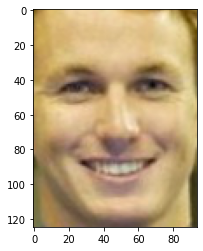

In [ ]:
plt.imshow(img1)

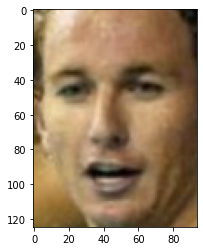

In [ ]:
plt.imshow(img2)

### Checking image shapes

In [ ]:
print(type(train_pairs),type(train_pairs[0][0]), type(train_pairs[0][1]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [ ]:
print( train_pairs.shape, train_pairs[0][0].shape, train_pairs[0][1].shape, train_labels.shape)

(2200, 2, 125, 94, 3) (125, 94, 3) (125, 94, 3) (2200,)


In [ ]:
train_labels.shape

(2200,)

# Utils

In [ ]:
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def euclidean_distance(vectors):

    (A,B) = vectors

    sum_squared = K.sum( K.square(A - B), keepdims= True, axis = 1)
    
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

In [ ]:
def plot_training(H):
    # construct a plot that plots the training history
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()

# Hyper-Parameters

The hyper parameters used for training are created here. This include the 

*   Number of Embedding Dimensions of the image.
*   Batch Size.
*   No of Epochs.
*   Shape of the image used to train the model.
*   Alpha value used for Leaky ReLU.



In [ ]:
image_shape = (125,94,3)
batch_size = 4
epochs = 100
leaky_relu_alpha = 0.03
embedding_dim = 1024        #1024 8

# Models

In [ ]:
# Import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, BatchNormalization
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras.regularizers import l2

# Siamese Network

In [ ]:
image_shape = (125,94,3)
batch_size = 4
epochs = 100
leaky_relu_alpha = 0.03
embedding_dim = 128        #1024 8

In [ ]:
def siamese_model1(inputShape, embedding_dim = embedding_dim):

    input = Input(inputShape)

    # First Set of Conv Layers
    x = Conv2D(32, (2,2), padding = "same", kernel_regularizer= l2(1e-5))(input)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(32, (2,2), padding = "same", kernel_regularizer= l2(1e-5))(input)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(64, (3,3), padding = "same", kernel_regularizer= l2(1e-5))(x)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(64, (3,3), padding = "same", kernel_regularizer= l2(1e-5))(x)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, (3,3), padding = "same", kernel_regularizer= l2(1e-5))(x)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, (3,3), padding = "same", kernel_regularizer= l2(1e-5))(x)
    x = LeakyReLU(alpha=leaky_relu_alpha) (x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)


    x = Flatten()(x)

    output = Dense(embedding_dim)(x)

    # Building the Model
    model = Model(input, output)

    return model

In [ ]:
print("[Training] building siamese network...")
imgA = Input(shape = image_shape)
imgB = Input(shape = image_shape)
featureExtractor = siamese_model1(image_shape, embedding_dim= embedding_dim)
featureA = featureExtractor(imgA)
featureB = featureExtractor(imgB)

distance = Lambda(euclidean_distance)([featureA, featureB])
final_outputs = Dense(1, activation="sigmoid") (distance)
model1 = Model( inputs = [imgA, imgB], outputs = final_outputs)
print("[Training] Built the Model")

[Training] building siamese network...
[Training] Built the Model


In [ ]:
md = siamese_model1(image_shape)
print(md.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 125, 94, 3)]      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 125, 94, 32)       416       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 125, 94, 32)       0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 125, 94, 32)       128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 62, 47, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 62, 47, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 62, 47, 64)        1849

In [ ]:
optim = tf.keras.optimizers.Adam(lr=0.0005)

In [ ]:
print("[Training] Compiling the Model")
model1.compile(optimizer= optim, loss= "binary_crossentropy", metrics=["accuracy"])

print("[Training] Training the Model")
history = model1.fit( [train_pairs[:, 0], train_pairs[:, 1]], train_labels[:],
                    validation_data= ( [test_pairs[:, 0], test_pairs[:, 1]], test_labels[:]), 
                    batch_size = batch_size, epochs = 100, shuffle=True  ) 

[Training] Compiling the Model
[Training] Training the Model
Epoch 1/100
550/550 [==============================] - 7s 10ms/step - loss: 17.9435 - accuracy: 0.4910 - val_loss: 1.0411 - val_accuracy: 0.5000
Epoch 2/100
550/550 [==============================] - 5s 9ms/step - loss: 1.8138 - accuracy: 0.5069 - val_loss: 0.6805 - val_accuracy: 0.5730
Epoch 3/100
550/550 [==============================] - 5s 9ms/step - loss: 0.8943 - accuracy: 0.5094 - val_loss: 0.6719 - val_accuracy: 0.5730
Epoch 4/100
550/550 [==============================] - 5s 9ms/step - loss: 0.7354 - accuracy: 0.5152 - val_loss: 0.6656 - val_accuracy: 0.6140
Epoch 5/100
550/550 [==============================] - 5s 9ms/step - loss: 0.7119 - accuracy: 0.4911 - val_loss: 0.6626 - val_accuracy: 0.6190
Epoch 6/100
550/550 [==============================] - 5s 9ms/step - loss: 0.7047 - accuracy: 0.5096 - val_loss: 0.6920 - val_accuracy: 0.5460
Epoch 7/100
550/550 [==============================] - 5s 9ms/step - loss: 0.70

# Loss Accuracy vs Epochs Plot

From the plot, it can be seen that there is a case of overfitting with the model used. After some 20+ epochs the difference between the Training and Validation accuracy increases.<br> Batch Normalization, Dropout and L2 Regularization was used to reduce overfitting, but it could have been further improved. A better network could reduce over fitting.


Plotting after Training


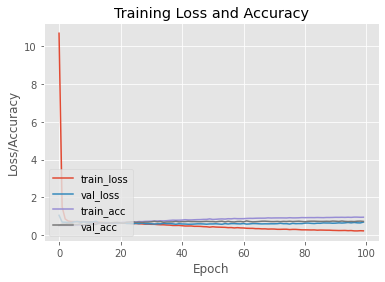

In [ ]:
print("Plotting after Training")
plot_training(history)

# Saving Model and Loading

In [ ]:
print("Saving Model")
model1.save("siamese_model")

Saving Model
INFO:tensorflow:Assets written to: siamese_model/assets


In [ ]:
model1.save_weights("siamese_weights")

In [ ]:
model1.save("cnn.h5")

# Finishing Up | Testing the Model.

In [ ]:
import argparse
import cv2
from tensorflow.keras.models import load_model

## Preparing images for testing

In [ ]:
imageA = cv2.imread('img1.jpg')
imageB = cv2.imread('img2.jpg')

In [ ]:
origA = imageA.copy()
origB = imageB.copy()

In [ ]:
imageA = cv2.resize(imageA, (94,125))
imageB = cv2.resize(imageB, (94,125))

In [ ]:
print(imageA.shape, imageB.shape)

(125, 94, 3) (125, 94, 3)


In [ ]:
# Adding Batch dimension to both images
imageA = np.expand_dims(imageA, axis=0)
imageB = np.expand_dims(imageB, axis=0)

In [ ]:
# Scale the pixel values to [0, 1] range.
imageA = imageA / 255.0
imageB = imageB / 255.0

Checking the shape of the image after adding the batch dimension.

In [ ]:
print(imageA.shape, imageB.shape)

(1, 125, 94, 3) (1, 125, 94, 3)


Using the model to predict the similarity in unseen images.

In [ ]:
preds = model.predict([imageA, imageB])
proba = preds[0][0]

In [ ]:
print("Similarity", proba)

Similarity 0.97279876


Displaying the images used for testing.

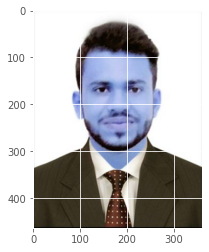

In [ ]:
# show first image
plt.imshow(origA)
plt.show()

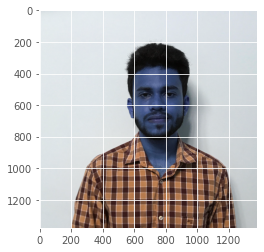

In [ ]:
plt.imshow(origB)

# Testing

In [ ]:
imageA = cv2.imread('/content/imgA.jpg')
imageB = cv2.imread('/content/imgB.jpg')
origA = imageA.copy()
origB = imageB.copy()
imageA = cv2.resize(imageA, (94,125))
imageB = cv2.resize(imageB, (94,125))
print(imageA.shape, imageB.shape)
# add a batch dimension to both images
imageA = np.expand_dims(imageA, axis=0)
imageB = np.expand_dims(imageB, axis=0)
# scale the pixel values to the range of [0, 1]
imageA = imageA / 255.0
imageB = imageB / 255.0
print(imageA.shape, imageB.shape)
preds = model.predict([imageA, imageB])
proba = preds[0][0]
print("Similarity", proba)

(125, 94, 3) (125, 94, 3)
(1, 125, 94, 3) (1, 125, 94, 3)
Similarity 0.7146469


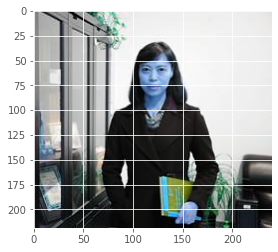

In [ ]:
# show first image
plt.imshow(origA)
plt.show()

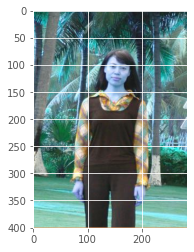

In [ ]:
plt.imshow(origB)

# End

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--input1", required=True,
	help="path for image 1")
ap.add_argument("-i", "--input2", required=True,
	help="path for image 2")
args = vars(ap.parse_args())

In [ ]:
model = load_model("cnn.h5")

# Command Line arguments to run the script

In [ ]:
!python dl.py -i1 "/content/imgA.jpg" -i2 "/content/imgB.jpg" -m "/content/cnn.h5"

2020-12-18 10:22:52.638012: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

[INFO] loading siamese model...
2020-12-18 10:22:54.593684: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-18 10:22:54.594669: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-18 10:22:54.628154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-18 10:22:54.628706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-18 10:22:54.628765: I tensorflow/stream_ex

In [ ]:
imageA = cv2.imread('/content/imgA.jpg')
imageB = cv2.imread('/content/imgB.jpg')
iA = cv2.resize(imageA, (94,125))
iB = cv2.resize(imageB, (94,125))
proba = 0.6

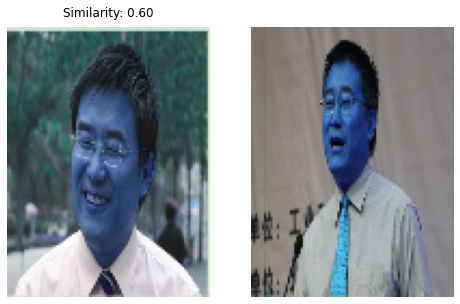

In [ ]:
fig = plt.figure("Pairs", figsize=(8,8))
# show first image
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Similarity: {:.2f}".format(proba), loc = "center", pad = 10)
plt.imshow(iA)
plt.axis("off")
# show the second image
ax = fig.add_subplot(1, 2, 2)
plt.imshow(iB)
plt.axis("off")
# show the plot
plt.show()

AttributeError: ignored

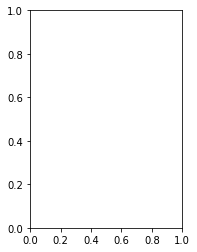

In [ ]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.axis("off")
plt.imshow(iA)
f.add_subplot(1,2, 2)
plt.axis("off")
plt.imshow(iB)
plt.show(block=True)

In [ ]:
!python dl.py -i1 "/content/imgA.jpg" -i2 "/content/imgB.jpg" -m "/content/cnn.h5"

2020-12-18 10:42:38.383588: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

[INFO] loading siamese model...
2020-12-18 10:42:40.340838: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-18 10:42:40.341797: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-18 10:42:40.374980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-18 10:42:40.375538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-18 10:42:40.375574: I tensorflow/stream_ex

In [ ]:
%matplotlib notebook
%matplotlib inline

In [ ]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

# Running the Similarity Detection script.


[INFO] loading siamese model...

Shape of Images after resizing
(125, 94, 3) (125, 94, 3)

Shape of Images after expanding the dimensions
(1, 125, 94, 3) (1, 125, 94, 3)

Similarity 0.7146471


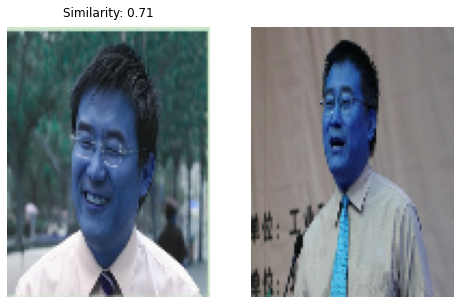

In [ ]:
%run dl.py -i1 "/content/imgA.jpg" -i2 "/content/imgB.jpg" -m "/content/cnn.h5"